In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
from matplotlib import cm
import time
import gc

# Classifier Libraries
import collections
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from tqdm import tqdm_notebook,trange, tqdm

# Other Libraries
# from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")
import mlrose

In [14]:
df = pd.read_csv("../data/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
237802,-0.296793,0.760206,2.161543,0.068915,-2.465194,-0.051840,1.251262,-0.251903,0.578921,-0.291859,...,-0.129114,0.084667,0.423257,-0.141324,-0.195630,0.527179,0.720999,-0.118347,-0.097244,0
6717,-0.293440,-0.896204,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,...,0.576656,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,1
60693,-0.279466,-0.414020,-0.117841,0.392402,0.999877,-0.831140,-0.555012,-1.063975,0.343171,-0.248752,...,-0.450110,-0.314370,-0.504158,-0.013244,0.392363,-0.681389,0.994878,-0.057940,0.139269,0
280149,0.780968,0.994596,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1
143728,-0.293440,0.010350,-1.756712,3.266574,-4.153388,3.924526,-1.753772,-1.005787,-4.313217,1.560712,...,0.874720,0.911427,0.053061,-0.367701,-0.776338,0.292094,0.026000,1.062968,0.501148,1


In [18]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [106]:
def smallest_sub(array):
    smallest = array[0][-1]
    idx = 0
    for i in range(0, len(array)):
        if (array[i][-1] < smallest):
            smallest = array[i][-1]
            idx = i
    return idx

## Gradient Descent Baseline

In [21]:
cross_val_score(mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                    algorithm ='gradient_descent', 
                    max_iters = 1000,
                    learning_rate = 0.001, 
                    curve=True), X_train, y_train, cv=5)

array([0.93037975, 0.93037975, 0.91719745, 0.93630573, 0.94267516])

In [22]:
param_dist_rhc = {
    "max_attempts": randint(1, 501),
    "learning_rate": uniform(.01, 1),
    "restarts": randint(1, 101)       
}

rand_nn_rhc = RandomizedSearchCV(mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                             algorithm ='random_hill_climb', max_iters=2000, curve=True),
                             param_dist_rhc, cv=5, n_jobs=-1, n_iter=50)

In [23]:
rand_nn_rhc.fit(X_train, y_train)
rand_nn_rhc_clf = rand_nn_rhc.best_estimator_
rand_nn_rhc_score = cross_val_score(rand_nn_rhc_clf, X_train, y_train, cv=5, n_jobs=-1)

In [24]:
rand_nn_rhc_clf

NeuralNetworkClassifier(activation='relu', algorithm='random_hill_climb',
            bias=True, clip_max=10000000000.0, curve=True,
            early_stopping=False, hidden_nodes=[30],
            learning_rate=0.2755097923626352, max_attempts=109,
            max_iters=2000, mutation_prob=0.1, pop_size=200, restarts=100,
            schedule=<mlrose.decay.GeomDecay object at 0x0000022D864A2940>)

In [25]:
param_dist_ga = {
    "max_attempts": randint(1, 501),
    "pop_size": randint(1, 201),
    "mutation_prob": uniform(0, 1)       
}

rand_nn_ga = RandomizedSearchCV(mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                             algorithm ='genetic_alg', max_iters=2000, curve=True),
                             param_dist_ga, cv=5, n_jobs=-1, n_iter=50)

In [26]:
rand_nn_ga.fit(X_train, y_train)
rand_nn_ga_clf = rand_nn_ga.best_estimator_
rand_nn_ga_score = cross_val_score(rand_nn_ga_clf, X_train, y_train, cv=5, n_jobs=-1)

In [107]:
smallest_sub(rand_nn_rhc_clf.fitness_curve)

78

In [28]:
param_dist_sa = {
    "schedule": [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()],
    "max_attempts": randint(1, 501)     
}

rand_nn_sa = RandomizedSearchCV(mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                             algorithm ='simulated_annealing', max_iters=2000, curve=True),
                             param_dist_sa, cv=5, n_jobs=-1, n_iter=50)

In [29]:
rand_nn_sa.fit(X_train, y_train)
rand_nn_sa_clf = rand_nn_sa.best_estimator_
rand_nn_sa_score = cross_val_score(rand_nn_sa_clf, X_train, y_train, cv=5, n_jobs=-1)

In [31]:
rand_nn_sa_score.mean()

0.7304845601870515

In [103]:
rand_nn_ga_score.mean()

0.8932838829315488

In [33]:
rand_nn_rhc_score.mean()

0.9149399338869628

In [34]:
rand_nn_rhc_clf.fitness_curve[40][-1]

-0.11541920789723663

In [109]:
rand_nn_ga_clf

NeuralNetworkClassifier(activation='relu', algorithm='genetic_alg', bias=True,
            clip_max=10000000000.0, curve=True, early_stopping=False,
            hidden_nodes=[30], learning_rate=0.1, max_attempts=500,
            max_iters=2000, mutation_prob=0.7869253729345153, pop_size=114,
            restarts=0,
            schedule=<mlrose.decay.GeomDecay object at 0x0000022D86490080>)

In [36]:
rand_nn_sa.cv_results_["params"]

[{'max_attempts': 126, 'schedule': <mlrose.decay.ArithDecay at 0x22d8647e358>},
 {'max_attempts': 255, 'schedule': <mlrose.decay.ArithDecay at 0x22d8647e358>},
 {'max_attempts': 97, 'schedule': <mlrose.decay.ExpDecay at 0x22d8647ed30>},
 {'max_attempts': 244, 'schedule': <mlrose.decay.ExpDecay at 0x22d8647ed30>},
 {'max_attempts': 423, 'schedule': <mlrose.decay.ArithDecay at 0x22d8647e358>},
 {'max_attempts': 31, 'schedule': <mlrose.decay.GeomDecay at 0x22d8647ec50>},
 {'max_attempts': 288, 'schedule': <mlrose.decay.ExpDecay at 0x22d8647ed30>},
 {'max_attempts': 193, 'schedule': <mlrose.decay.ExpDecay at 0x22d8647ed30>},
 {'max_attempts': 151, 'schedule': <mlrose.decay.ArithDecay at 0x22d8647e358>},
 {'max_attempts': 146, 'schedule': <mlrose.decay.ArithDecay at 0x22d8647e358>},
 {'max_attempts': 213, 'schedule': <mlrose.decay.GeomDecay at 0x22d8647ec50>},
 {'max_attempts': 280, 'schedule': <mlrose.decay.ExpDecay at 0x22d8647ed30>},
 {'max_attempts': 182, 'schedule': <mlrose.decay.Arith

In [37]:
saParams = {
    'ExpDecay' : {
        'xs': [],
        'ys': [],
    },
    'GeomDecay': {
        'xs': [],
        'ys': [],
    },
    'ArithDecay': {
        'xs': [],
        'ys': [],
    }
}

for i in range(0, len(rand_nn_sa.cv_results_['params'])):
    saParams[rand_nn_sa.cv_results_['params'][i]['schedule'].__class__.__name__]['xs'].append(rand_nn_sa.cv_results_['params'][i]['max_attempts'])
    saParams[rand_nn_sa.cv_results_['params'][i]['schedule'].__class__.__name__]['ys'].append(rand_nn_sa.cv_results_['mean_test_score'][i])
    

In [38]:
saParams

{'ExpDecay': {'xs': [97,
   244,
   288,
   193,
   280,
   229,
   218,
   56,
   341,
   72,
   398,
   12,
   406,
   436,
   412,
   123,
   119,
   438,
   252,
   4,
   113,
   456,
   80],
  'ys': [0.6836086404066074,
   0.7534942820838628,
   0.7369758576874206,
   0.7878017789072427,
   0.8144853875476493,
   0.6886912325285895,
   0.7141041931385006,
   0.7280813214739518,
   0.7776365946632783,
   0.7331639135959339,
   0.7026683608640406,
   0.7229987293519695,
   0.7763659466327827,
   0.7141041931385006,
   0.7763659466327827,
   0.7001270648030495,
   0.735705209656925,
   0.7039390088945362,
   0.8030495552731893,
   0.7153748411689962,
   0.7674714104193139,
   0.7153748411689962,
   0.6861499364675985]},
 'GeomDecay': {'xs': [31,
   213,
   160,
   168,
   436,
   286,
   358,
   216,
   455,
   497,
   296,
   450],
  'ys': [0.8246505717916137,
   0.7382465057179162,
   0.7928843710292249,
   0.7318932655654383,
   0.7801778907242694,
   0.7649301143583227,
   0.7649

Text(0.5,0,'Attempts')

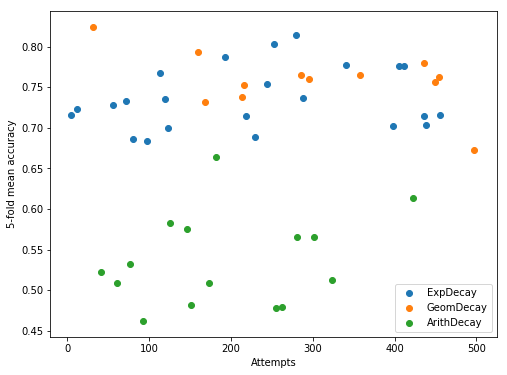

In [39]:

plt.figure(figsize=(8, 6))
legendNames = [];
for x in saParams.keys():
    legendNames.append(x)
    plt.scatter(saParams[x]['xs'], saParams[x]['ys'])
plt.legend(legendNames)
plt.ylabel("5-fold mean accuracy")
plt.xlabel("Attempts")

Text(0,0.5,'Fitness')

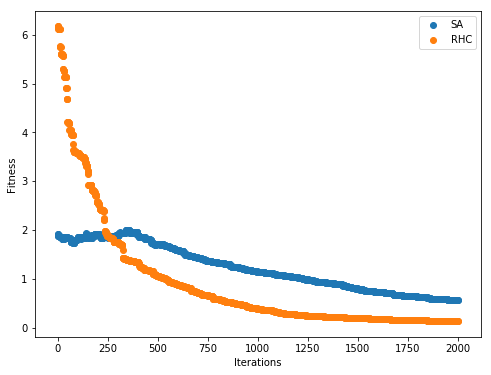

In [40]:
plt.figure(figsize=(8, 6))
best_pop = smallest_sub(rand_nn_ga_clf.fitness_curve)
best_attempt = smallest_sub(rand_nn_rhc_clf.fitness_curve)
plt.scatter(np.arange(len(rand_nn_sa_clf.fitness_curve)), rand_nn_sa_clf.fitness_curve *-1)
plt.scatter(np.arange(len(rand_nn_rhc_clf.fitness_curve[best_attempt])), np.array(rand_nn_rhc_clf.fitness_curve[best_attempt]) *-1)
plt.legend(["SA", "RHC"])
plt.xlabel("Iterations")
plt.ylabel("Fitness")

In [41]:
len(rand_nn_rhc_clf.fitness_curve[0])

2000

In [42]:
np.array(rand_nn_rhc_clf.fitness_curve[0]) * -1

array([6.14703945, 6.11357617, 6.10525415, ..., 0.1042955 , 0.1042955 ,
       0.1042955 ])

In [43]:
def smallest_sub(array):
    smallest = array[0][-1]
    idx = 0
    for i in range(0, len(array)):
        if (array[i][-1] > smallest):
            smallest = array[i][-1]
            idx = i
    return idx

In [44]:
smallest_sub(rand_nn_ga_clf.fitness_curve)

744

In [45]:
len(rand_nn_ga_clf.fitness_curve)

835

In [46]:
best_ga_fitness = []
for i in rand_nn_ga_clf.fitness_curve:
    best_ga_fitness.append(i.max() * -1)

Text(0,0.5,'Best Individual Fitness')

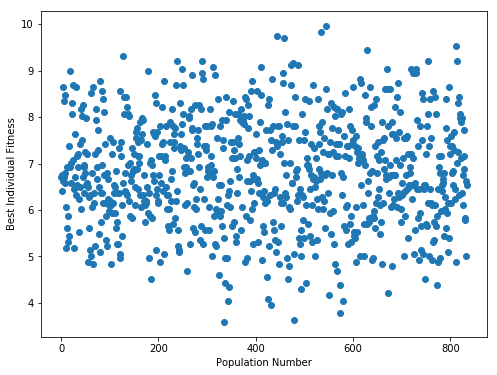

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(best_ga_fitness)), best_ga_fitness)
plt.xlabel("Population Number")
plt.ylabel("Best Individual Fitness")

NameError: name 'rand_nn_' is not defined

In [49]:
(rand_nn_sa.cv_results_['mean_test_score'][0])

0.5832274459974587

In [72]:
ys = []
xs = []
qs = []
zs = [];
for i in range(0, len(rand_nn_ga.cv_results_["params"])):
    zs.append(rand_nn_ga.cv_results_['mean_test_score'][i])
    xs.append(rand_nn_ga.cv_results_["params"][i]["max_attempts"])
    ys.append(rand_nn_ga.cv_results_["params"][i]["mutation_prob"])
    qs.append(rand_nn_ga.cv_results_["params"][i]["pop_size"])

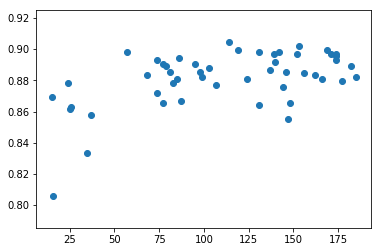

In [51]:
plt.scatter(qs, zs)

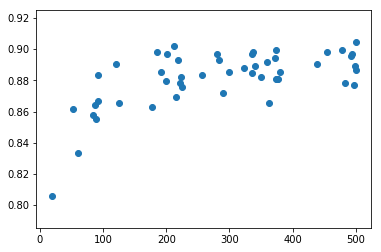

In [52]:
plt.scatter(xs, zs)

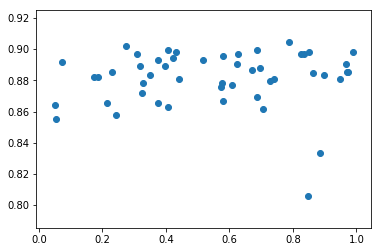

In [53]:
plt.scatter(ys, zs)

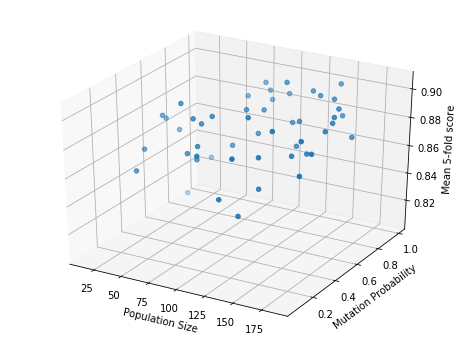

In [73]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(qs, ys, zs)

ax.set_xlabel('Population Size')
ax.set_ylabel('Mutation Probability')
ax.set_zlabel('Mean 5-fold score')

plt.show()

Text(0.5,0,'Mean 5-fold score')

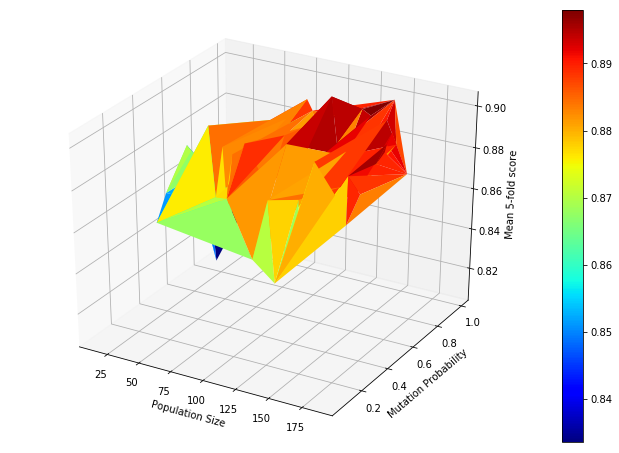

In [91]:
fig = plt.figure(figsize=(9, 6))
ax = Axes3D(fig)
surf = ax.plot_trisurf(qs, ys, zs, cmap=cm.jet, linewidth=0.1)
# ax.set_zlim(.7, 1.01)

# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# fig.colorbar(surf, shrink=0.5, aspect=5)
fig.colorbar(surf)
ax.set_xlabel('Population Size')
ax.set_ylabel('Mutation Probability')
ax.set_zlabel('Mean 5-fold score')


In [55]:
ys = []
xs = []
zs = [];
qs = [];
for i in range(0, len(rand_nn_rhc.cv_results_["params"])):
    zs.append(rand_nn_rhc.cv_results_['mean_test_score'][i])
    xs.append(rand_nn_rhc.cv_results_["params"][i]["max_attempts"])
    ys.append(rand_nn_rhc.cv_results_["params"][i]["learning_rate"])    
    qs.append(rand_nn_rhc.cv_results_["params"][i]["restarts"])        

Text(0,0.5,'Mean 5-fold Accuracy')

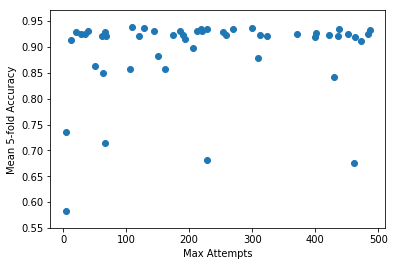

In [56]:
plt.scatter(xs, zs)
plt.xlabel("Max Attempts")
plt.ylabel("Mean 5-fold Accuracy")

Text(0,0.5,'Mean 5-fold Accuracy')

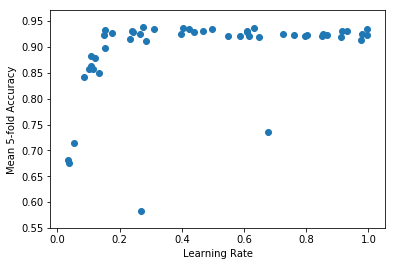

In [57]:
plt.scatter(ys, zs)
plt.xlabel("Learning Rate")
plt.ylabel("Mean 5-fold Accuracy")

Text(0,0.5,'Mean 5-fold Accuracy')

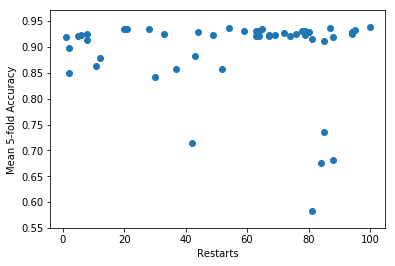

In [58]:
plt.scatter(qs, zs)
plt.xlabel("Restarts")
plt.ylabel("Mean 5-fold Accuracy")

In [59]:
np.median(rand_nn_sa.cv_results_['mean_fit_time'])

5.621166038513183

In [60]:
np.median(rand_nn_rhc.cv_results_['mean_fit_time'])

251.88968567848207

In [61]:
np.median(rand_nn_ga.cv_results_['mean_fit_time'])

139.97218184471132

In [62]:
rand_nn_rhc.cv_results_

{'mean_fit_time': array([198.39566627, 282.49009142, 348.59979687, 268.67776384,
        196.3895155 , 138.47023282,  36.19658542, 361.68180666,
         13.34311175, 120.99397707, 372.84953594,  27.84931178,
        325.92065678, 254.75001845, 382.29527063, 257.54672828,
        348.84726872, 230.7825789 , 249.0293529 , 358.02837982,
         13.40594325, 324.1883616 , 407.86820908,  57.94479709,
        169.36685147, 439.00829606,  92.19577088, 339.92411819,
         11.07882957, 291.31451335,  24.42929945, 261.83562613,
          9.99201608, 260.35999165, 149.7042563 , 357.89669304,
        295.64671102, 198.50287294, 232.64510546,   5.18233876,
        427.1819622 ,  54.36888981, 197.93986626, 321.84030681,
        257.21082225,   7.95412555,  90.84061971, 387.33286152,
        311.88165946, 222.32614155]),
 'std_fit_time': array([ 1.53631689,  4.52077264,  9.06577005,  6.73515991,  3.00374094,
         1.01252048,  0.59451378,  5.18283683,  0.19221935,  1.51009708,
         5.8920

In [63]:
test_time = mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                             algorithm ='random_hill_climb', max_iters=2000, curve=True)

In [64]:
start_time = time.time()
test_time.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.47475528717041016 seconds ---


In [95]:
accuracy_score(y_test, rand_nn_rhc_clf.predict(X_test))

0.9289340101522843

In [96]:
accuracy_score(y_test, rand_nn_sa_clf.predict(X_test))

0.8071065989847716

In [97]:
accuracy_score(y_test, rand_nn_ga_clf.predict(X_test))

0.8883248730964467

In [100]:
descent = mlrose.NeuralNetworkClassifier(hidden_nodes = [30], activation ='relu', 
                    algorithm ='gradient_descent', 
                    max_iters = 1000,
                    learning_rate = 0.001, 
                    curve=True)

In [101]:
start_time = time.time()
descent.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 3.0358798503875732 seconds ---


In [102]:
accuracy_score(y_test, descent.predict(X_test))

0.934010152284264

In [110]:
rand_nn_ga_clf

NeuralNetworkClassifier(activation='relu', algorithm='genetic_alg', bias=True,
            clip_max=10000000000.0, curve=True, early_stopping=False,
            hidden_nodes=[30], learning_rate=0.1, max_attempts=500,
            max_iters=2000, mutation_prob=0.7869253729345153, pop_size=114,
            restarts=0,
            schedule=<mlrose.decay.GeomDecay object at 0x0000022D86490080>)